## Sberbank Russian Housing Market
##### Group member: Ying Zhang, Zhian Wang

In [1]:
wd = "/Users/zwang/GWU/Kaggle/Housing_Mkt/data"
import pandas as pd
import numpy as np
train_df = pd.read_csv(wd+"/train.csv")
train_df = train_df.reset_index(drop=True)
test_df = pd.read_csv(wd+"/test.csv")
test_df = test_df.reset_index(drop=True)

### Data Preparation

In [2]:
# Remove the outlier of full_sq
ind = train_df[train_df['full_sq'] > 2000].index
train_df = train_df.drop(ind)

In [3]:
# Remove the outliter in life_sq
ind = train_df[train_df['life_sq'] > 2000].index
train_df = train_df.drop(ind)

In [4]:
# Remove the outliter in kitch_sq
ind = train_df[train_df['kitch_sq'] > 500].index
train_df = train_df.drop(ind)

In [5]:
(train_df['life_sq'] > train_df['full_sq']).sum()
life_sq = train_df['life_sq'].ix[train_df['life_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
train_df['life_sq'].ix[train_df['life_sq'] > train_df['full_sq']] = train_df['full_sq']*life_full
(train_df['life_sq'] > train_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [6]:
(test_df['life_sq'] > test_df['full_sq']).sum()
life_sq = test_df['life_sq'].ix[test_df['life_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
life_full = life_sq/full_sq 
life_full
test_df['life_sq'].ix[test_df['life_sq'] > test_df['full_sq']] = test_df['full_sq']*life_full
(test_df['life_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [7]:
kitch_sq = train_df['kitch_sq'].ix[train_df['kitch_sq'] < train_df['full_sq']].median()
full_sq = train_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
train_df['kitch_sq'].ix[train_df['kitch_sq'] > train_df['full_sq']] = train_df['full_sq']*kitch_full
(train_df['kitch_sq'] > train_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [8]:
kitch_sq = test_df['kitch_sq'].ix[test_df['kitch_sq'] < test_df['full_sq']].median()
full_sq = test_df['full_sq'].median()
kitch_full = kitch_sq/full_sq 
kitch_full
test_df['kitch_sq'].ix[test_df['kitch_sq'] > test_df['full_sq']] = test_df['full_sq']*kitch_full
(test_df['kitch_sq'] > test_df['full_sq']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [9]:
train_df['floor'].ix[train_df['floor'] > train_df['max_floor']] = train_df['max_floor']*0.5
(train_df['floor'] > train_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [10]:
test_df['floor'].ix[test_df['floor'] > test_df['max_floor']] = test_df['max_floor']*0.5
(test_df['floor'] > test_df['max_floor']).sum()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [11]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]

In [12]:
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])

### Impute Missing Value

In [13]:
train_na = train_df.isnull().sum()
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na_list = train_na.index.tolist()
train_na_list

['hospital_beds_raion',
 'build_year',
 'state',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_avg_price_1000',
 'life_sq',
 'build_count_before_1920',
 'build_count_block',
 'raion_build_count_with_material_info',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_1971-1995',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_after_1995',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',


In [14]:
train_df = train_df.fillna(train_df.mean())

In [15]:
test_df = test_df.fillna(test_df.mean())

#### Add some features

In [16]:
def add_features(df):
    
    #Floor
    df['floor_ratio'] = df['floor'] / df['max_floor'].astype(float)
    df['floor_from_top'] = df['max_floor'] - df['floor']
    #Sq areas
    df['kitch_sq_ratio'] = df['kitch_sq'] / df['full_sq'].astype(float)
    df['life_sq_ratio'] = df['life_sq'] / df['full_sq'].astype(float)
    df['full_sq_per_room'] = df['full_sq'] / df['num_room'].astype(float)
    df['life_sq_per_room'] = df['life_sq'] / df['num_room'].astype(float)
    df['full_living_sq_diff'] = df['full_sq'] - df['life_sq']

    #Date
    df["year"] = pd.to_datetime(df["timestamp"], coerce=True).dt.year
    df["month"] = pd.to_datetime(df["timestamp"], coerce=True).dt.month
    df["day"] = pd.to_datetime(df["timestamp"], coerce=True).dt.day
    df["dayofyear"] = pd.to_datetime(df["timestamp"], coerce=True).dt.dayofyear
    

    return df

In [17]:
train_df = add_features(train_df)
test_df = add_features(test_df)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [18]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,floor_from_top,kitch_sq_ratio,life_sq_ratio,full_sq_per_room,life_sq_per_room,full_living_sq_diff,year,month,day,dayofyear
0,1,2011-08-20,43,27.0,4.0,12.559613,1.826736,1879.239962,1.909826,5.970745,...,8.559613,0.138855,0.627907,22.515137,14.137412,16.0,2011,8,20,232
1,2,2011-08-23,34,19.0,3.0,12.559613,1.826736,1879.239962,1.909826,5.970745,...,9.559613,0.175610,0.558824,17.802667,9.948549,15.0,2011,8,23,235
2,3,2011-08-27,43,29.0,2.0,12.559613,1.826736,1879.239962,1.909826,5.970745,...,10.559613,0.138855,0.674419,22.515137,15.184627,14.0,2011,8,27,239
3,4,2011-09-01,89,50.0,9.0,12.559613,1.826736,1879.239962,1.909826,5.970745,...,3.559613,0.067087,0.561798,46.601098,26.180392,39.0,2011,9,1,244
4,5,2011-09-05,77,77.0,4.0,12.559613,1.826736,1879.239962,1.909826,5.970745,...,8.559613,0.077542,1.000000,40.317804,40.317804,0.0,2011,9,5,248


#### Log the price

In [ ]:
#train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

### Variable importance

In [ ]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
X_train = train_df.drop(labels=['timestamp', 'id', 'incineration_raion'], axis=1).dropna()
y_train = X_train['price_doc_log']
X_train.drop('price_doc_log', axis=1, inplace=True)
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(X_train[f])
        X_train[f] = lbl.transform(X_train[f])
rf = RandomForestRegressor(random_state=0)
rf = rf.fit(X_train, y_train)
"""

In [ ]:
"""
fi = list(zip(X_train.columns, rf.feature_importances_))
print('## rf variable importance')
d = [print('## %-40s%s' % (i)) for i in fi[:30]]
"""

In [ ]:
#print(fi[:30])

In [ ]:
#[i[0] for i in fi[:30]]

In [ ]:
#train_df = train_df.drop('price_doc_log',axis = 1)

## Model

In [19]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch 
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import xgboost as xgb
h2o.init() # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import numpy as np
import pandas as pd

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_131"; Java(TM) SE Runtime Environment (build 1.8.0_131-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmp8eg6xfml
  JVM stdout: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmp8eg6xfml/h2o_zwang_started_from_python.out
  JVM stderr: /var/folders/4r/5_zmhl8n2y90_l2743gnnbj00000gn/T/tmp8eg6xfml/h2o_zwang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.12.0.1
H2O cluster version age:,12 days
H2O cluster name:,H2O_from_python_zwang_1djy09
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [20]:
print(train_df.shape)
print(test_df.shape)

(30464, 303)
(7662, 302)


In [21]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

dummy_col = np.random.rand(test.shape[0])
test = test.cbind(h2o.H2OFrame(dummy_col))
cols = test.columns
cols[-1] = 'price_doc'
test.columns = cols
print(train.shape)
print(test.shape)

(30464, 303)
(7662, 303)


In [22]:
def get_type_lists(frame=train, rejects=['id', 'price_doc']):   
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [23]:
original_nums, cats = get_type_lists()

Numeric = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 

In [24]:
train, valid = train.split_frame([0.7], seed=12345)
print(train.shape)
print(valid.shape)

(21378, 303)
(9086, 303)


### Encode categorical vars using shrunken averages

In [25]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)

In [26]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, test, var, 'price_doc')
    v_enc, ts_enc = target_encoder(valid, test, var, 'price_doc')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

Encoding: product_type (1/15) ...
Encoding: sub_area (2/15) ...
Encoding: culture_objects_top_25 (3/15) ...
Encoding: thermal_power_plant_raion (4/15) ...
Encoding: incineration_raion (5/15) ...
Encoding: oil_chemistry_raion (6/15) ...
Encoding: radiation_raion (7/15) ...
Encoding: railroad_terminal_raion (8/15) ...
Encoding: big_market_raion (9/15) ...
Encoding: nuclear_reactor_raion (10/15) ...
Encoding: detention_facility_raion (11/15) ...
Encoding: water_1line (12/15) ...
Encoding: big_road1_1line (13/15) ...
Encoding: railroad_1line (14/15) ...
Encoding: ecology (15/15) ...
Done.


In [27]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 

### Log the price

price_doc
15.582
15.6073
15.556


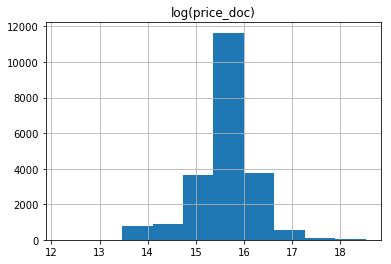

In [28]:
# Check log transform - looks good
%matplotlib inline
train['price_doc'].log().as_data_frame().hist()

# Execute log transform
train['price_doc'] = train['price_doc'].log()
valid['price_doc'] = valid['price_doc'].log()
print(train[0:3, 'price_doc'])
#print(valid[0:3, 'price_doc'])

In [29]:
print(train.shape)
print(valid.shape)
print(test.shape)

(21378, 318)
(9086, 318)
(7662, 318)


#### Define ranked predictions plot function

In [30]:
def ranked_preds_plot(y, valid, preds):
    
    """ Generates ranked prediction plot.
    
    :param y: Name of target variable.
    :param valid: Name of validation H2OFrame.
    :param preds: Column vector of predictions to plot.

    """
    
    # plot top frame values
    preds.columns = ['predict']
    yhat_frame = valid.cbind(preds)
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')

### Variable importance

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1497922672377_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.23725550272439444
RMSE: 0.48708880373541175
MAE: 0.30513703873695397
RMSLE: 0.030140761215599783
Mean Residual Deviance: 0.23725550272439444

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.25674443555091325
RMSE: 0.5066995515598107
MAE: 0.31306386350074694
RMSLE: 0.03150636306353933
Mean Residual Deviance: 0.25674443555091325

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.23975761409746874
RMSE: 0.4896505019883761
MAE: 0.30708782988805805
RMSLE: 0.03029233592027176
Mean Residual Deviance: 0.23975761409746874
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.3070729,0.0035880,0.3067297,0.3134520,0.3010371
mean_residual_deviance,0.2397489,0.0053245,0.2345666,0.2503967,0.2342834
mse,0.2397489,0.0053245,0.2345666,0.2503967,0.2342834
r2,0.3365479,0.0061250,0.3471285,0.325911,0.3366042
residual_deviance,0.2397489,0.0053245,0.2345666,0.2503967,0.2342834
rmse,0.4895819,0.0054080,0.4843208,0.5003966,0.4840283
rmsle,0.0302880,0.0003401,0.0299371,0.0309680,0.0299590


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 21:44:29,2 min 30.643 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 21:44:30,2 min 30.847 sec,1.0,0.5263045,0.3242152,0.2769964,0.5713551,0.3494752,0.3264467
,2017-06-19 21:44:30,2 min 31.003 sec,2.0,0.5492293,0.3501960,0.3016528,0.5453950,0.3415341,0.2974557
,2017-06-19 21:44:30,2 min 31.183 sec,3.0,0.5468577,0.3536612,0.2990533,0.5376251,0.3403235,0.2890408
,2017-06-19 21:44:30,2 min 31.384 sec,4.0,0.5384993,0.3432625,0.2899815,0.5251659,0.3303937,0.2757992
---,---,---,---,---,---,---,---,---,---
,2017-06-19 21:45:16,3 min 17.073 sec,164.0,0.4873822,0.3054840,0.2375414,0.5068688,0.3133368,0.2569160
,2017-06-19 21:45:16,3 min 17.486 sec,165.0,0.4875462,0.3056881,0.2377013,0.5070598,0.3135316,0.2571096
,2017-06-19 21:45:17,3 min 17.915 sec,166.0,0.4873197,0.3054347,0.2374804,0.5068485,0.3132939,0.2568954
,2017-06-19 21:45:17,3 min 18.354 sec,167.0,0.4871813,0.3052307,0.2373457,0.5067639,0.3131916,0.2568096



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq,35142.2773438,1.0,0.0829232
life_sq,14506.6621094,0.4127980,0.0342305
num_room,14045.0722656,0.3996631,0.0331413
full_living_sq_diff,13651.3398438,0.3884592,0.0322123
sub_area_Tencode,13337.5957031,0.3795313,0.0314719
---,---,---,---
nuclear_reactor_raion_Tencode,28.3415642,0.0008065,0.0000669
mosque_count_500,27.6763611,0.0007876,0.0000653
mosque_count_1500,21.9011726,0.0006232,0.0000517
incineration_raion_Tencode,15.2459431,0.0004338,0.0000360



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,15.8585
14.5087,15.5987
14.5087,15.4213
14.4307,15.6827
15.6561,15.5477
15.8824,15.5068
15.4642,15.5286
15.5905,15.495
16.7224,15.7787
15.556,15.453


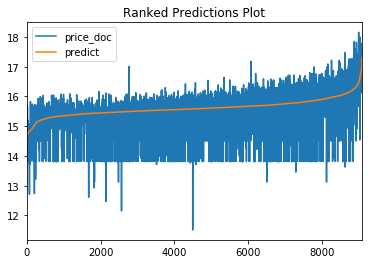

In [31]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)

In [32]:
l = rf_model1.varimp()
FI = [i[0] for i in l[:50]]

In [33]:
print(FI)

['full_sq', 'life_sq', 'num_room', 'full_living_sq_diff', 'sub_area_Tencode', 'cafe_count_5000_price_2500', 'kitch_sq_ratio', 'full_sq_per_room', 'cafe_count_2000', 'cafe_count_5000_price_high', 'kitch_sq', 'cafe_count_3000_price_1000', 'life_sq_per_room', 'sport_count_3000', 'cafe_count_3000', 'trc_count_3000', 'cafe_count_3000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_5000_price_1000', 'cafe_count_2000_price_1500', 'timestamp', 'year', 'cafe_count_3000_price_2500', 'nuclear_reactor_km', 'cafe_count_5000', 'market_shop_km', 'life_sq_ratio', 'ttk_km', 'cafe_count_5000_price_1500', 'big_church_km', 'office_sqm_5000', 'swim_pool_km', 'cafe_count_1500_price_2500', 'sadovoe_km', 'build_year', 'floor_ratio', 'max_floor', 'cafe_sum_5000_min_price_avg', 'sport_count_5000', 'metro_min_avto', 'floor', 'prom_part_5000', 'material', 'cafe_count_1500', 'office_count_3000', 'metro_km_walk', 'ice_rink_km', 'kremlin_km', 'prom_part_1500', 'prom_part_3000']


### Create combination features

In [34]:
def feature_combiner(training_frame, test_frame, nums):
    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame

In [35]:
train, _ = feature_combiner(train, test, FI)
valid, test = feature_combiner(valid, test, FI)

Combining: full_sq (1/50) ...
Combining: life_sq (2/50) ...
Combining: num_room (3/50) ...
Combining: full_living_sq_diff (4/50) ...
Combining: sub_area_Tencode (5/50) ...
Combining: cafe_count_5000_price_2500 (6/50) ...
Combining: kitch_sq_ratio (7/50) ...
Combining: full_sq_per_room (8/50) ...
Combining: cafe_count_2000 (9/50) ...
Combining: cafe_count_5000_price_high (10/50) ...
Combining: kitch_sq (11/50) ...
Combining: cafe_count_3000_price_1000 (12/50) ...
Combining: life_sq_per_room (13/50) ...
Combining: sport_count_3000 (14/50) ...
Combining: cafe_count_3000 (15/50) ...
Combining: trc_count_3000 (16/50) ...
Combining: cafe_count_3000_price_1500 (17/50) ...
Combining: cafe_count_2000_price_2500 (18/50) ...
Combining: cafe_count_5000_price_1000 (19/50) ...
Combining: cafe_count_2000_price_1500 (20/50) ...
Combining: timestamp (21/50) ...
Combining: year (22/50) ...
Combining: cafe_count_3000_price_2500 (23/50) ...
Combining: nuclear_reactor_km (24/50) ...
Combining: cafe_count_5

In [36]:
encoded_combined_nums, cats = get_type_lists(frame=train)

Numeric = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 

#### Function to generate submission file

In [37]:
import re
import time

def gen_submission(preds, test=test):
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['id'].cbind(preds.exp())
    sub.columns = ['id', 'price_doc']
    
    # save file for submission
    sub_fname = wd+'/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)
    return sub

### Native XGBoost

In [39]:

ave_y = train['price_doc'].mean()[0] ###

# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas data frames 
dtrain1 = xgb.DMatrix(train.as_data_frame()[encoded_combined_nums],
                      train.as_data_frame()['price_doc'], feature_names = encoded_combined_nums) ###
dvalid1 = xgb.DMatrix(valid.as_data_frame()[encoded_combined_nums],
                      valid.as_data_frame()['price_doc'], feature_names = encoded_combined_nums)
dtest = xgb.DMatrix(test.as_data_frame()[encoded_combined_nums], feature_names = encoded_combined_nums)



In [40]:
# tuning parameters
params1 = {
    'objective': 'reg:linear',
    'booster': 'gbtree', 
    'eval_metric': 'rmse',
    'eta': 0.005,
    'subsample': 0.1, 
    'colsample_bytree': 0.8,
    'max_depth': 5,
    'reg_alpha' : 0.007,
    'reg_lambda' : 0.0,
    'base_score': ave_y,
    'silent': 0,
    'seed': 12345,
}

# watchlist is used for early stopping
watchlist = [(dtrain1, 'train'), (dvalid1, 'eval')]

# train model
xgb_model1 = xgb.train(params1, 
                       dtrain1, 
                       10000,
                       evals=watchlist, 
                       early_stopping_rounds=50,   ###
                       verbose_eval=True)

num_boost_round = xgb_model1.best_iteration

# create assessment stats and submission file
#xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('price_log', valid, xgb_preds1_val) 
#xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
#gen_submission(xgb_preds1_test) 


[0]	train-rmse:0.59999	eval-rmse:0.61152
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1]	train-rmse:0.598813	eval-rmse:0.610502
[2]	train-rmse:0.597772	eval-rmse:0.609613
[3]	train-rmse:0.596587	eval-rmse:0.608548
[4]	train-rmse:0.595463	eval-rmse:0.607577
[5]	train-rmse:0.594447	eval-rmse:0.606674
[6]	train-rmse:0.593395	eval-rmse:0.605766
[7]	train-rmse:0.592276	eval-rmse:0.604814
[8]	train-rmse:0.59122	eval-rmse:0.603896
[9]	train-rmse:0.590129	eval-rmse:0.602929
[10]	train-rmse:0.589064	eval-rmse:0.601988
[11]	train-rmse:0.588115	eval-rmse:0.601109
[12]	train-rmse:0.587141	eval-rmse:0.600258
[13]	train-rmse:0.586141	eval-rmse:0.599366
[14]	train-rmse:0.585158	eval-rmse:0.598562
[15]	train-rmse:0.584246	eval-rmse:0.597734
[16]	train-rmse:0.583253	eval-rmse:0.596868
[17]	train-rmse:0.582236	eval-rmse:0.59597
[18]	train-rmse:0.581239	eval-rmse:0.595076
[19]	train-rmse:0.580305	eval-rmse:

In [ ]:
#[820]	train-rmse:0.437213
#0.33717 public leaderborad

In [41]:

xgb_preds1_val = h2o.H2OFrame(xgb_model1.predict(dvalid1).tolist())
#ranked_preds_plot('SalePrice', valid, xgb_preds1_val) 
xgb_preds1_test = h2o.H2OFrame(xgb_model1.predict(dtest).tolist())
gen_submission(xgb_preds1_test)


id,price_doc
30474,5.11936e+06
30475,7.99001e+06
30476,5.08307e+06
30477,5.54961e+06
30478,4.96376e+06
30479,7.49812e+06
30480,4.66874e+06
30481,4.46513e+06
30482,4.81307e+06
30483,4.98875e+06


### H2O Random forest model

In [43]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    model_id = 'rf_model',
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

#rf_preds1_val = rf_model1.predict(valid)
#ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
#rf_preds1_test = rf_model1.predict(test)
#gen_submission(rf_preds1_test) 

#Training RMSE: 0.4592090940116257

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21087299202297807
RMSE: 0.4592090940116257
MAE: 0.2760753785488149
RMSLE: 0.028568605657083006
Mean Residual Deviance: 0.21087299202297807

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.23494252907022495
RMSE: 0.48470870537903993
MAE: 0.28852611500120884
RMSLE: 0.03026888370632583
Mean Residual Deviance: 0.23494252907022495

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2131638916730692
RMSE: 0.4616967529375415
MAE: 0.2786139313110819
RMSLE: 0.028715533685903964
Mean Residual Deviance: 0.2131638916730692
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2786088,0.0025920,0.2763418,0.2837798,0.2757049
mean_residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
mse,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
r2,0.4100608,0.0099264,0.4299059,0.3996588,0.4006176
residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
rmse,0.4616305,0.0057262,0.4525770,0.4722313,0.4600832
rmsle,0.0287111,0.0003665,0.0281355,0.0293921,0.0286058


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:25:06,15 min 56.000 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:25:07,15 min 57.217 sec,1.0,0.4867282,0.2910480,0.2369043,0.5634144,0.3320047,0.3174358
,2017-06-19 22:25:09,15 min 58.535 sec,2.0,0.5111595,0.3017874,0.2612840,0.5238575,0.3140537,0.2744266
,2017-06-19 22:25:10,15 min 59.833 sec,3.0,0.5079742,0.2981248,0.2580378,0.5064670,0.3031029,0.2565088
,2017-06-19 22:25:11,16 min 1.062 sec,4.0,0.5101147,0.2989313,0.2602170,0.5017589,0.2995439,0.2517620
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:30:14,21 min 3.558 sec,197.0,0.4592784,0.2761292,0.2109367,0.4846649,0.2884518,0.2349000
,2017-06-19 22:30:16,21 min 5.332 sec,198.0,0.4592463,0.2761408,0.2109072,0.4846532,0.2884900,0.2348887
,2017-06-19 22:30:17,21 min 7.028 sec,199.0,0.4592263,0.2761141,0.2108888,0.4846794,0.2885168,0.2349141
,2017-06-19 22:30:19,21 min 8.660 sec,200.0,0.4592223,0.2761047,0.2108852,0.4847081,0.2885424,0.2349419



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39322.9687500,1.0,0.0545502
full_sq|timestamp,32796.4062500,0.8340267,0.0454963
full_sq,29035.1699219,0.7383769,0.0402786
full_sq|year,25140.6835938,0.6393384,0.0348761
life_sq|sub_area_Tencode,19574.5195312,0.4977884,0.0271545
---,---,---,---
cafe_count_3000|cafe_count_5000_price_1500,5.4520702,0.0001386,0.0000076
thermal_power_plant_raion_Tencode,3.8659797,0.0000983,0.0000054
cafe_count_5000_price_high|cafe_count_2000_price_1500,3.7422025,0.0000952,0.0000052
cafe_count_5000|cafe_count_5000_price_1500,1.1854330,0.0000301,0.0000016



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,16.1645
14.5087,15.4641
14.5087,15.3966
14.4307,15.6168
15.6561,15.461
15.8824,15.5267
15.4642,15.4424
15.5905,15.3035
16.7224,16.0794
15.556,15.3195


id,price_doc
30474,5.24742e+06
30475,8.30184e+06
30476,5.12588e+06
30477,5.77016e+06
30478,5.02673e+06
30479,7.95502e+06
30480,4.51352e+06
30481,4.41383e+06
30482,4.28557e+06
30483,4.73502e+06


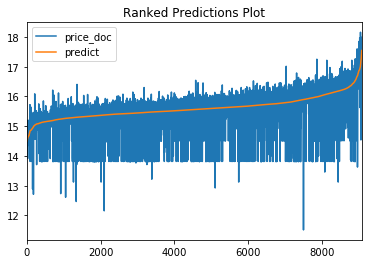

In [44]:
rf_preds1_val = rf_model1.predict(valid)
ranked_preds_plot('price_doc', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)
gen_submission(rf_preds1_test) 
#  public leaderboard

### H2O Extremely random trees model

In [46]:
# initialize extra trees model
ert_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345,
    model_id='ert_model',
    histogram_type='random') # <- this is what makes it ERT instead of RF

# train ert model
ert_model1.train(
    x=encoded_combined_nums,
    y='price_doc',
    training_frame=train,
    validation_frame=valid)

# print model information/create submission
print(ert_model1)

#Training RMSE: 0.4595724410094952

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  ert_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21120682853542594
RMSE: 0.4595724410094952
MAE: 0.27588608581835955
RMSLE: 0.028593260860482254
Mean Residual Deviance: 0.21120682853542594

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.2355212203462485
RMSE: 0.48530528571843157
MAE: 0.2887770594760789
RMSLE: 0.03030429508758695
Mean Residual Deviance: 0.2355212203462485

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21315025334195675
RMSE: 0.46168198290810175
MAE: 0.2784468638859835
RMSLE: 0.028714256362615875
Mean Residual Deviance: 0.21315025334195675
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2784421,0.0026356,0.2760113,0.2837080,0.2756070
mean_residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
mse,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
r2,0.4101168,0.0102229,0.4304977,0.3985162,0.4013366
residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
rmse,0.4616099,0.0059400,0.4523421,0.4726804,0.4598072
rmsle,0.0287095,0.0003798,0.0281199,0.0294191,0.0285894


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:49:08,16 min 51.391 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:49:10,16 min 53.033 sec,1.0,0.5018344,0.2954181,0.2518378,0.5698556,0.3319361,0.3247354
,2017-06-19 22:49:12,16 min 54.814 sec,2.0,0.5190096,0.3050134,0.2693710,0.5259479,0.3132083,0.2766212
,2017-06-19 22:49:13,16 min 56.282 sec,3.0,0.5146958,0.3001397,0.2649117,0.5101900,0.3059111,0.2602938
,2017-06-19 22:49:15,16 min 57.882 sec,4.0,0.5143422,0.2990762,0.2645479,0.5045759,0.3023703,0.2545969
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:54:49,22 min 32.072 sec,186.0,0.4595553,0.2758160,0.2111911,0.4853046,0.2887467,0.2355206
,2017-06-19 22:54:51,22 min 34.040 sec,187.0,0.4595387,0.2758304,0.2111758,0.4852806,0.2887473,0.2354973
,2017-06-19 22:54:53,22 min 35.987 sec,188.0,0.4595784,0.2758813,0.2112123,0.4853058,0.2887495,0.2355218
,2017-06-19 22:54:55,22 min 37.899 sec,189.0,0.4595467,0.2758631,0.2111831,0.4853229,0.2887695,0.2355384



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39255.1601562,1.0,0.0579021
full_sq|timestamp,30806.2421875,0.7847692,0.0454398
full_sq,26515.3046875,0.6754604,0.0391106
full_sq|year,24292.3964844,0.6188332,0.0358318
full_sq|num_room,20001.6718750,0.5095297,0.0295029
---,---,---,---
cafe_count_3000_price_1500|sport_count_5000,5.6099968,0.0001429,0.0000083
cafe_count_5000_price_high|cafe_count_3000_price_1500,4.1632566,0.0001061,0.0000061
cafe_count_5000_price_1500|cafe_sum_5000_min_price_avg,3.8128850,0.0000971,0.0000056
mosque_count_1000,0.1195194,0.0000030,0.0000002



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,16.1904
14.5087,15.4438
14.5087,15.3565
14.4307,15.5916
15.6561,15.4248
15.8824,15.5267
15.4642,15.4449
15.5905,15.2897
16.7224,16.1173
15.556,15.3317


id,price_doc
30474,5.22295e+06
30475,8.32591e+06
30476,5.27305e+06
30477,5.71935e+06
30478,5.01455e+06
30479,7.76249e+06
30480,4.46219e+06
30481,4.40455e+06
30482,4.12224e+06
30483,4.8783e+06


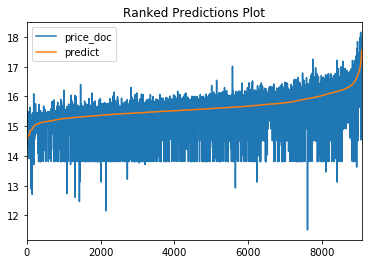

In [47]:
ert_preds1_val = ert_model1.predict(valid)
ranked_preds_plot('price_doc', valid, ert_preds1_val) # valid RMSE not so hot ...
ert_preds1_test = ert_model1.predict(test)
gen_submission(ert_preds1_test) 

#  public leaderboard

### H2O GBM model

In [48]:
# initialize H2O GBM
h2o_gbm_model = H2OGradientBoostingEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    model_id='gbm_model',
    seed = 12345)

# execute training
h2o_gbm_model.train(x=encoded_combined_nums,
                    y='price_doc',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_gbm_model)

#Training RMSE: 0.4294278354558745

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1844082658643176
RMSE: 0.4294278354558745
MAE: 0.2596140010440101
RMSLE: 0.026803936088514987
Mean Residual Deviance: 0.1844082658643176

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.23442318452988564
RMSE: 0.4841726804869164
MAE: 0.2895952807648911
RMSLE: 0.030237739634111055
Mean Residual Deviance: 0.23442318452988564

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2122228337047963
RMSE: 0.46067649571559033
MAE: 0.27756558998736497
RMSLE: 0.02866049998328605
Mean Residual Deviance: 0.2122228337047963
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2775568,0.0030894,0.2757406,0.2835795,0.2733502
mean_residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
mse,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
r2,0.4127010,0.0084761,0.4294221,0.4019248,0.406756
residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
rmse,0.4606098,0.0055519,0.4527690,0.4713392,0.4577212
rmsle,0.0286560,0.0003575,0.0281544,0.0293481,0.0284656


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-20 00:25:15,1:29:00.671,0.0,0.6011072,0.4210946,0.3613298,0.6125376,0.4277439,0.3752023
,2017-06-20 00:25:17,1:29:03.152,1.0,0.5999842,0.4201474,0.3599811,0.6115451,0.4268720,0.3739874
,2017-06-20 00:25:22,1:29:07.717,4.0,0.5965838,0.4171377,0.3559122,0.6084833,0.4240417,0.3702520
,2017-06-20 00:25:26,1:29:12.463,7.0,0.5932964,0.4142471,0.3520006,0.6055628,0.4213892,0.3667063
,2017-06-20 00:25:31,1:29:16.990,10.0,0.5900765,0.4114036,0.3481903,0.6026894,0.4187433,0.3632345
---,---,---,---,---,---,---,---,---,---
,2017-06-20 00:50:43,1:54:29.328,1133.0,0.4307758,0.2606437,0.1855678,0.4842717,0.2899276,0.2345191
,2017-06-20 00:51:04,1:54:50.575,1153.0,0.4304054,0.2603683,0.1852488,0.4842662,0.2898468,0.2345138
,2017-06-20 00:51:25,1:55:11.651,1174.0,0.4300697,0.2599596,0.1849600,0.4842185,0.2896073,0.2344676
,2017-06-20 00:51:48,1:55:34.029,1195.0,0.4296921,0.2597074,0.1846353,0.4842406,0.2895921,0.2344890



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,149058.5468750,1.0,0.6019408
full_sq|timestamp,14810.6904297,0.0993616,0.0598098
life_sq|sub_area_Tencode,11649.0869141,0.0781511,0.0470423
full_sq|year,2513.0905762,0.0168598,0.0101486
num_room|timestamp,1968.3464355,0.0132052,0.0079487
---,---,---,---
build_year|office_count_3000,0.0,0.0,0.0
cafe_sum_5000_min_price_avg|office_count_3000,0.0,0.0,0.0
sport_count_5000|office_count_3000,0.0,0.0,0.0
cafe_count_1500|office_count_3000,0.0,0.0,0.0



See the whole table with table.as_data_frame()



price_doc,predict
16.3881,16.0175
14.5087,15.3128
14.5087,15.2334
14.4307,15.4384
15.6561,15.3186
15.8824,15.239
15.4642,15.2243
15.5905,15.0362
16.7224,15.8676
15.556,15.2806


id,price_doc
30474,5.28861e+06
30475,8.61101e+06
30476,5.0402e+06
30477,5.69606e+06
30478,5.06737e+06
30479,7.20975e+06
30480,4.73914e+06
30481,4.51299e+06
30482,4.72048e+06
30483,4.92481e+06


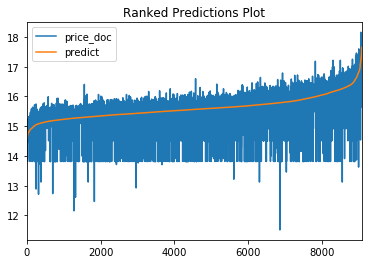

In [49]:
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
ranked_preds_plot('price_doc', valid, h2o_gbm_preds1_val) # better validation error
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)
gen_submission(h2o_gbm_preds1_test) 

#  public leaderboard

### Train H2O stacked ensemble

In [54]:
stack = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid,
                                    base_models=[rf_model1, ert_model1, 
                                                 h2o_gbm_model,xgb_model1])

stack.train(x=encoded_combined_nums,
            y='price_doc',
            training_frame=train,
            validation_frame=valid)

# print model information/create submission
print(stack)

# stacking without xgb
# RMSE: 0.39708713580391003

# stacking all four model
# RMSE: 0.4592090940116257


Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21087299202297807
RMSE: 0.4592090940116257
MAE: 0.2760753785488149
RMSLE: 0.028568605657083006
Mean Residual Deviance: 0.21087299202297807

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.23494252907022495
RMSE: 0.48470870537903993
MAE: 0.28852611500120884
RMSLE: 0.03026888370632583
Mean Residual Deviance: 0.23494252907022495

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2131638916730692
RMSE: 0.4616967529375415
MAE: 0.2786139313110819
RMSLE: 0.028715533685903964
Mean Residual Deviance: 0.2131638916730692
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2786088,0.0025920,0.2763418,0.2837798,0.2757049
mean_residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
mse,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
r2,0.4100608,0.0099264,0.4299059,0.3996588,0.4006176
residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
rmse,0.4616305,0.0057262,0.4525770,0.4722313,0.4600832
rmsle,0.0287111,0.0003665,0.0281355,0.0293921,0.0286058


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:25:06,15 min 56.000 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:25:07,15 min 57.217 sec,1.0,0.4867282,0.2910480,0.2369043,0.5634144,0.3320047,0.3174358
,2017-06-19 22:25:09,15 min 58.535 sec,2.0,0.5111595,0.3017874,0.2612840,0.5238575,0.3140537,0.2744266
,2017-06-19 22:25:10,15 min 59.833 sec,3.0,0.5079742,0.2981248,0.2580378,0.5064670,0.3031029,0.2565088
,2017-06-19 22:25:11,16 min 1.062 sec,4.0,0.5101147,0.2989313,0.2602170,0.5017589,0.2995439,0.2517620
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:30:14,21 min 3.558 sec,197.0,0.4592784,0.2761292,0.2109367,0.4846649,0.2884518,0.2349000
,2017-06-19 22:30:16,21 min 5.332 sec,198.0,0.4592463,0.2761408,0.2109072,0.4846532,0.2884900,0.2348887
,2017-06-19 22:30:17,21 min 7.028 sec,199.0,0.4592263,0.2761141,0.2108888,0.4846794,0.2885168,0.2349141
,2017-06-19 22:30:19,21 min 8.660 sec,200.0,0.4592223,0.2761047,0.2108852,0.4847081,0.2885424,0.2349419



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39322.9687500,1.0,0.0545502
full_sq|timestamp,32796.4062500,0.8340267,0.0454963
full_sq,29035.1699219,0.7383769,0.0402786
full_sq|year,25140.6835938,0.6393384,0.0348761
life_sq|sub_area_Tencode,19574.5195312,0.4977884,0.0271545
---,---,---,---
cafe_count_3000|cafe_count_5000_price_1500,5.4520702,0.0001386,0.0000076
thermal_power_plant_raion_Tencode,3.8659797,0.0000983,0.0000054
cafe_count_5000_price_high|cafe_count_2000_price_1500,3.7422025,0.0000952,0.0000052
cafe_count_5000|cafe_count_5000_price_1500,1.1854330,0.0000301,0.0000016



See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  ert_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21120682853542594
RMSE: 0.4595724410094952
MAE: 0.27588608581835955
RMSLE: 0.028593260860482254
Mean Residual Deviance: 0.21120682853542594

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.2355212203462485
RMSE: 0.48530528571843157
MAE: 0.2887770594760789
RMSLE: 0.03030429508758695
Mean Residual Deviance: 0.2355212203462485

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21315025334195675
RMSE: 0.46168198290810175
MAE: 0.2784468638859835
RMSLE: 0.028714256362615875
Mean Residual Deviance: 0.21315025334195675
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2784421,0.0026356,0.2760113,0.2837080,0.2756070
mean_residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
mse,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
r2,0.4101168,0.0102229,0.4304977,0.3985162,0.4013366
residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
rmse,0.4616099,0.0059400,0.4523421,0.4726804,0.4598072
rmsle,0.0287095,0.0003798,0.0281199,0.0294191,0.0285894


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:49:08,16 min 51.391 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:49:10,16 min 53.033 sec,1.0,0.5018344,0.2954181,0.2518378,0.5698556,0.3319361,0.3247354
,2017-06-19 22:49:12,16 min 54.814 sec,2.0,0.5190096,0.3050134,0.2693710,0.5259479,0.3132083,0.2766212
,2017-06-19 22:49:13,16 min 56.282 sec,3.0,0.5146958,0.3001397,0.2649117,0.5101900,0.3059111,0.2602938
,2017-06-19 22:49:15,16 min 57.882 sec,4.0,0.5143422,0.2990762,0.2645479,0.5045759,0.3023703,0.2545969
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:54:49,22 min 32.072 sec,186.0,0.4595553,0.2758160,0.2111911,0.4853046,0.2887467,0.2355206
,2017-06-19 22:54:51,22 min 34.040 sec,187.0,0.4595387,0.2758304,0.2111758,0.4852806,0.2887473,0.2354973
,2017-06-19 22:54:53,22 min 35.987 sec,188.0,0.4595784,0.2758813,0.2112123,0.4853058,0.2887495,0.2355218
,2017-06-19 22:54:55,22 min 37.899 sec,189.0,0.4595467,0.2758631,0.2111831,0.4853229,0.2887695,0.2355384



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39255.1601562,1.0,0.0579021
full_sq|timestamp,30806.2421875,0.7847692,0.0454398
full_sq,26515.3046875,0.6754604,0.0391106
full_sq|year,24292.3964844,0.6188332,0.0358318
full_sq|num_room,20001.6718750,0.5095297,0.0295029
---,---,---,---
cafe_count_3000_price_1500|sport_count_5000,5.6099968,0.0001429,0.0000083
cafe_count_5000_price_high|cafe_count_3000_price_1500,4.1632566,0.0001061,0.0000061
cafe_count_5000_price_1500|cafe_sum_5000_min_price_avg,3.8128850,0.0000971,0.0000056
mosque_count_1000,0.1195194,0.0000030,0.0000002



See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1844082658643176
RMSE: 0.4294278354558745
MAE: 0.2596140010440101
RMSLE: 0.026803936088514987
Mean Residual Deviance: 0.1844082658643176

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.23442318452988564
RMSE: 0.4841726804869164
MAE: 0.2895952807648911
RMSLE: 0.030237739634111055
Mean Residual Deviance: 0.23442318452988564

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2122228337047963
RMSE: 0.46067649571559033
MAE: 0.27756558998736497
RMSLE: 0.02866049998328605
Mean Residual Deviance: 0.2122228337047963
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2775568,0.0030894,0.2757406,0.2835795,0.2733502
mean_residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
mse,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
r2,0.4127010,0.0084761,0.4294221,0.4019248,0.406756
residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
rmse,0.4606098,0.0055519,0.4527690,0.4713392,0.4577212
rmsle,0.0286560,0.0003575,0.0281544,0.0293481,0.0284656


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-20 00:25:15,1:29:00.671,0.0,0.6011072,0.4210946,0.3613298,0.6125376,0.4277439,0.3752023
,2017-06-20 00:25:17,1:29:03.152,1.0,0.5999842,0.4201474,0.3599811,0.6115451,0.4268720,0.3739874
,2017-06-20 00:25:22,1:29:07.717,4.0,0.5965838,0.4171377,0.3559122,0.6084833,0.4240417,0.3702520
,2017-06-20 00:25:26,1:29:12.463,7.0,0.5932964,0.4142471,0.3520006,0.6055628,0.4213892,0.3667063
,2017-06-20 00:25:31,1:29:16.990,10.0,0.5900765,0.4114036,0.3481903,0.6026894,0.4187433,0.3632345
---,---,---,---,---,---,---,---,---,---
,2017-06-20 00:50:43,1:54:29.328,1133.0,0.4307758,0.2606437,0.1855678,0.4842717,0.2899276,0.2345191
,2017-06-20 00:51:04,1:54:50.575,1153.0,0.4304054,0.2603683,0.1852488,0.4842662,0.2898468,0.2345138
,2017-06-20 00:51:25,1:55:11.651,1174.0,0.4300697,0.2599596,0.1849600,0.4842185,0.2896073,0.2344676
,2017-06-20 00:51:48,1:55:34.029,1195.0,0.4296921,0.2597074,0.1846353,0.4842406,0.2895921,0.2344890



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,149058.5468750,1.0,0.6019408
full_sq|timestamp,14810.6904297,0.0993616,0.0598098
life_sq|sub_area_Tencode,11649.0869141,0.0781511,0.0470423
full_sq|year,2513.0905762,0.0168598,0.0101486
num_room|timestamp,1968.3464355,0.0132052,0.0079487
---,---,---,---
build_year|office_count_3000,0.0,0.0,0.0
cafe_sum_5000_min_price_avg|office_count_3000,0.0,0.0,0.0
sport_count_5000|office_count_3000,0.0,0.0,0.0
cafe_count_1500|office_count_3000,0.0,0.0,0.0



See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21087299202297807
RMSE: 0.4592090940116257
MAE: 0.2760753785488149
RMSLE: 0.028568605657083006
Mean Residual Deviance: 0.21087299202297807

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.23494252907022495
RMSE: 0.48470870537903993
MAE: 0.28852611500120884
RMSLE: 0.03026888370632583
Mean Residual Deviance: 0.23494252907022495

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2131638916730692
RMSE: 0.4616967529375415
MAE: 0.2786139313110819
RMSLE: 0.028715533685903964
Mean Residual Deviance: 0.2131638916730692
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2786088,0.0025920,0.2763418,0.2837798,0.2757049
mean_residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
mse,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
r2,0.4100608,0.0099264,0.4299059,0.3996588,0.4006176
residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
rmse,0.4616305,0.0057262,0.4525770,0.4722313,0.4600832
rmsle,0.0287111,0.0003665,0.0281355,0.0293921,0.0286058


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:25:06,15 min 56.000 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:25:07,15 min 57.217 sec,1.0,0.4867282,0.2910480,0.2369043,0.5634144,0.3320047,0.3174358
,2017-06-19 22:25:09,15 min 58.535 sec,2.0,0.5111595,0.3017874,0.2612840,0.5238575,0.3140537,0.2744266
,2017-06-19 22:25:10,15 min 59.833 sec,3.0,0.5079742,0.2981248,0.2580378,0.5064670,0.3031029,0.2565088
,2017-06-19 22:25:11,16 min 1.062 sec,4.0,0.5101147,0.2989313,0.2602170,0.5017589,0.2995439,0.2517620
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:30:14,21 min 3.558 sec,197.0,0.4592784,0.2761292,0.2109367,0.4846649,0.2884518,0.2349000
,2017-06-19 22:30:16,21 min 5.332 sec,198.0,0.4592463,0.2761408,0.2109072,0.4846532,0.2884900,0.2348887
,2017-06-19 22:30:17,21 min 7.028 sec,199.0,0.4592263,0.2761141,0.2108888,0.4846794,0.2885168,0.2349141
,2017-06-19 22:30:19,21 min 8.660 sec,200.0,0.4592223,0.2761047,0.2108852,0.4847081,0.2885424,0.2349419



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39322.9687500,1.0,0.0545502
full_sq|timestamp,32796.4062500,0.8340267,0.0454963
full_sq,29035.1699219,0.7383769,0.0402786
full_sq|year,25140.6835938,0.6393384,0.0348761
life_sq|sub_area_Tencode,19574.5195312,0.4977884,0.0271545
---,---,---,---
cafe_count_3000|cafe_count_5000_price_1500,5.4520702,0.0001386,0.0000076
thermal_power_plant_raion_Tencode,3.8659797,0.0000983,0.0000054
cafe_count_5000_price_high|cafe_count_2000_price_1500,3.7422025,0.0000952,0.0000052
cafe_count_5000|cafe_count_5000_price_1500,1.1854330,0.0000301,0.0000016



See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  ert_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21120682853542594
RMSE: 0.4595724410094952
MAE: 0.27588608581835955
RMSLE: 0.028593260860482254
Mean Residual Deviance: 0.21120682853542594

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.2355212203462485
RMSE: 0.48530528571843157
MAE: 0.2887770594760789
RMSLE: 0.03030429508758695
Mean Residual Deviance: 0.2355212203462485

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21315025334195675
RMSE: 0.46168198290810175
MAE: 0.2784468638859835
RMSLE: 0.028714256362615875
Mean Residual Deviance: 0.21315025334195675
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2784421,0.0026356,0.2760113,0.2837080,0.2756070
mean_residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
mse,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
r2,0.4101168,0.0102229,0.4304977,0.3985162,0.4013366
residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
rmse,0.4616099,0.0059400,0.4523421,0.4726804,0.4598072
rmsle,0.0287095,0.0003798,0.0281199,0.0294191,0.0285894


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:49:08,16 min 51.391 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:49:10,16 min 53.033 sec,1.0,0.5018344,0.2954181,0.2518378,0.5698556,0.3319361,0.3247354
,2017-06-19 22:49:12,16 min 54.814 sec,2.0,0.5190096,0.3050134,0.2693710,0.5259479,0.3132083,0.2766212
,2017-06-19 22:49:13,16 min 56.282 sec,3.0,0.5146958,0.3001397,0.2649117,0.5101900,0.3059111,0.2602938
,2017-06-19 22:49:15,16 min 57.882 sec,4.0,0.5143422,0.2990762,0.2645479,0.5045759,0.3023703,0.2545969
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:54:49,22 min 32.072 sec,186.0,0.4595553,0.2758160,0.2111911,0.4853046,0.2887467,0.2355206
,2017-06-19 22:54:51,22 min 34.040 sec,187.0,0.4595387,0.2758304,0.2111758,0.4852806,0.2887473,0.2354973
,2017-06-19 22:54:53,22 min 35.987 sec,188.0,0.4595784,0.2758813,0.2112123,0.4853058,0.2887495,0.2355218
,2017-06-19 22:54:55,22 min 37.899 sec,189.0,0.4595467,0.2758631,0.2111831,0.4853229,0.2887695,0.2355384



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39255.1601562,1.0,0.0579021
full_sq|timestamp,30806.2421875,0.7847692,0.0454398
full_sq,26515.3046875,0.6754604,0.0391106
full_sq|year,24292.3964844,0.6188332,0.0358318
full_sq|num_room,20001.6718750,0.5095297,0.0295029
---,---,---,---
cafe_count_3000_price_1500|sport_count_5000,5.6099968,0.0001429,0.0000083
cafe_count_5000_price_high|cafe_count_3000_price_1500,4.1632566,0.0001061,0.0000061
cafe_count_5000_price_1500|cafe_sum_5000_min_price_avg,3.8128850,0.0000971,0.0000056
mosque_count_1000,0.1195194,0.0000030,0.0000002



See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1844082658643176
RMSE: 0.4294278354558745
MAE: 0.2596140010440101
RMSLE: 0.026803936088514987
Mean Residual Deviance: 0.1844082658643176

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.23442318452988564
RMSE: 0.4841726804869164
MAE: 0.2895952807648911
RMSLE: 0.030237739634111055
Mean Residual Deviance: 0.23442318452988564

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2122228337047963
RMSE: 0.46067649571559033
MAE: 0.27756558998736497
RMSLE: 0.02866049998328605
Mean Residual Deviance: 0.2122228337047963
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2775568,0.0030894,0.2757406,0.2835795,0.2733502
mean_residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
mse,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
r2,0.4127010,0.0084761,0.4294221,0.4019248,0.406756
residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
rmse,0.4606098,0.0055519,0.4527690,0.4713392,0.4577212
rmsle,0.0286560,0.0003575,0.0281544,0.0293481,0.0284656


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-20 00:25:15,1:29:00.671,0.0,0.6011072,0.4210946,0.3613298,0.6125376,0.4277439,0.3752023
,2017-06-20 00:25:17,1:29:03.152,1.0,0.5999842,0.4201474,0.3599811,0.6115451,0.4268720,0.3739874
,2017-06-20 00:25:22,1:29:07.717,4.0,0.5965838,0.4171377,0.3559122,0.6084833,0.4240417,0.3702520
,2017-06-20 00:25:26,1:29:12.463,7.0,0.5932964,0.4142471,0.3520006,0.6055628,0.4213892,0.3667063
,2017-06-20 00:25:31,1:29:16.990,10.0,0.5900765,0.4114036,0.3481903,0.6026894,0.4187433,0.3632345
---,---,---,---,---,---,---,---,---,---
,2017-06-20 00:50:43,1:54:29.328,1133.0,0.4307758,0.2606437,0.1855678,0.4842717,0.2899276,0.2345191
,2017-06-20 00:51:04,1:54:50.575,1153.0,0.4304054,0.2603683,0.1852488,0.4842662,0.2898468,0.2345138
,2017-06-20 00:51:25,1:55:11.651,1174.0,0.4300697,0.2599596,0.1849600,0.4842185,0.2896073,0.2344676
,2017-06-20 00:51:48,1:55:34.029,1195.0,0.4296921,0.2597074,0.1846353,0.4842406,0.2895921,0.2344890



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,149058.5468750,1.0,0.6019408
full_sq|timestamp,14810.6904297,0.0993616,0.0598098
life_sq|sub_area_Tencode,11649.0869141,0.0781511,0.0470423
full_sq|year,2513.0905762,0.0168598,0.0101486
num_room|timestamp,1968.3464355,0.0132052,0.0079487
---,---,---,---
build_year|office_count_3000,0.0,0.0,0.0
cafe_sum_5000_min_price_avg|office_count_3000,0.0,0.0,0.0
sport_count_5000|office_count_3000,0.0,0.0,0.0
cafe_count_1500|office_count_3000,0.0,0.0,0.0



See the whole table with table.as_data_frame()


H2OTypeError: Argument `base_models` should be a ?list(string), got list [, , , <xgboost.core.Booster object at 0x110872cc0>]

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21087299202297807
RMSE: 0.4592090940116257
MAE: 0.2760753785488149
RMSLE: 0.028568605657083006
Mean Residual Deviance: 0.21087299202297807

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.23494252907022495
RMSE: 0.48470870537903993
MAE: 0.28852611500120884
RMSLE: 0.03026888370632583
Mean Residual Deviance: 0.23494252907022495

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.2131638916730692
RMSE: 0.4616967529375415
MAE: 0.2786139313110819
RMSLE: 0.028715533685903964
Mean Residual Deviance: 0.2131638916730692
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2786088,0.0025920,0.2763418,0.2837798,0.2757049
mean_residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
mse,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
r2,0.4100608,0.0099264,0.4299059,0.3996588,0.4006176
residual_deviance,0.2131683,0.0052998,0.204826,0.2230024,0.2116766
rmse,0.4616305,0.0057262,0.4525770,0.4722313,0.4600832
rmsle,0.0287111,0.0003665,0.0281355,0.0293921,0.0286058


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:25:06,15 min 56.000 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:25:07,15 min 57.217 sec,1.0,0.4867282,0.2910480,0.2369043,0.5634144,0.3320047,0.3174358
,2017-06-19 22:25:09,15 min 58.535 sec,2.0,0.5111595,0.3017874,0.2612840,0.5238575,0.3140537,0.2744266
,2017-06-19 22:25:10,15 min 59.833 sec,3.0,0.5079742,0.2981248,0.2580378,0.5064670,0.3031029,0.2565088
,2017-06-19 22:25:11,16 min 1.062 sec,4.0,0.5101147,0.2989313,0.2602170,0.5017589,0.2995439,0.2517620
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:30:14,21 min 3.558 sec,197.0,0.4592784,0.2761292,0.2109367,0.4846649,0.2884518,0.2349000
,2017-06-19 22:30:16,21 min 5.332 sec,198.0,0.4592463,0.2761408,0.2109072,0.4846532,0.2884900,0.2348887
,2017-06-19 22:30:17,21 min 7.028 sec,199.0,0.4592263,0.2761141,0.2108888,0.4846794,0.2885168,0.2349141
,2017-06-19 22:30:19,21 min 8.660 sec,200.0,0.4592223,0.2761047,0.2108852,0.4847081,0.2885424,0.2349419



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39322.9687500,1.0,0.0545502
full_sq|timestamp,32796.4062500,0.8340267,0.0454963
full_sq,29035.1699219,0.7383769,0.0402786
full_sq|year,25140.6835938,0.6393384,0.0348761
life_sq|sub_area_Tencode,19574.5195312,0.4977884,0.0271545
---,---,---,---
cafe_count_3000|cafe_count_5000_price_1500,5.4520702,0.0001386,0.0000076
thermal_power_plant_raion_Tencode,3.8659797,0.0000983,0.0000054
cafe_count_5000_price_high|cafe_count_2000_price_1500,3.7422025,0.0000952,0.0000052
cafe_count_5000|cafe_count_5000_price_1500,1.1854330,0.0000301,0.0000016



See the whole table with table.as_data_frame()
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  ert_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21120682853542594
RMSE: 0.4595724410094952
MAE: 0.27588608581835955
RMSLE: 0.028593260860482254
Mean Residual Deviance: 0.21120682853542594

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.2355212203462485
RMSE: 0.48530528571843157
MAE: 0.2887770594760789
RMSLE: 0.03030429508758695
Mean Residual Deviance: 0.2355212203462485

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21315025334195675
RMSE: 0.46168198290810175
MAE: 0.2784468638859835
RMSLE: 0.028714256362615875
Mean Residual Deviance: 0.21315025334195675
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2784421,0.0026356,0.2760113,0.2837080,0.2756070
mean_residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
mse,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
r2,0.4101168,0.0102229,0.4304977,0.3985162,0.4013366
residual_deviance,0.2131543,0.0054996,0.2046134,0.2234268,0.2114226
rmse,0.4616099,0.0059400,0.4523421,0.4726804,0.4598072
rmsle,0.0287095,0.0003798,0.0281199,0.0294191,0.0285894


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-19 22:49:08,16 min 51.391 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-19 22:49:10,16 min 53.033 sec,1.0,0.5018344,0.2954181,0.2518378,0.5698556,0.3319361,0.3247354
,2017-06-19 22:49:12,16 min 54.814 sec,2.0,0.5190096,0.3050134,0.2693710,0.5259479,0.3132083,0.2766212
,2017-06-19 22:49:13,16 min 56.282 sec,3.0,0.5146958,0.3001397,0.2649117,0.5101900,0.3059111,0.2602938
,2017-06-19 22:49:15,16 min 57.882 sec,4.0,0.5143422,0.2990762,0.2645479,0.5045759,0.3023703,0.2545969
---,---,---,---,---,---,---,---,---,---
,2017-06-19 22:54:49,22 min 32.072 sec,186.0,0.4595553,0.2758160,0.2111911,0.4853046,0.2887467,0.2355206
,2017-06-19 22:54:51,22 min 34.040 sec,187.0,0.4595387,0.2758304,0.2111758,0.4852806,0.2887473,0.2354973
,2017-06-19 22:54:53,22 min 35.987 sec,188.0,0.4595784,0.2758813,0.2112123,0.4853058,0.2887495,0.2355218
,2017-06-19 22:54:55,22 min 37.899 sec,189.0,0.4595467,0.2758631,0.2111831,0.4853229,0.2887695,0.2355384



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,39255.1601562,1.0,0.0579021
full_sq|timestamp,30806.2421875,0.7847692,0.0454398
full_sq,26515.3046875,0.6754604,0.0391106
full_sq|year,24292.3964844,0.6188332,0.0358318
full_sq|num_room,20001.6718750,0.5095297,0.0295029
---,---,---,---
cafe_count_3000_price_1500|sport_count_5000,5.6099968,0.0001429,0.0000083
cafe_count_5000_price_high|cafe_count_3000_price_1500,4.1632566,0.0001061,0.0000061
cafe_count_5000_price_1500|cafe_sum_5000_min_price_avg,3.8128850,0.0000971,0.0000056
mosque_count_1000,0.1195194,0.0000030,0.0000002



See the whole table with table.as_data_frame()
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1844082658643176
RMSE: 0.4294278354558745
MAE: 0.2596140010440101
RMSLE: 0.026803936088514987
Mean Residual Deviance: 0.1844082658643176

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.23442318452988564
RMSE: 0.4841726804869164
MAE: 0.2895952807648911
RMSLE: 0.030237739634111055
Mean Residual Deviance: 0.23442318452988564

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.2122228337047963
RMSE: 0.46067649571559033
MAE: 0.27756558998736497
RMSLE: 0.02866049998328605
Mean Residual Deviance: 0.2122228337047963
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.2775568,0.0030894,0.2757406,0.2835795,0.2733502
mean_residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
mse,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
r2,0.4127010,0.0084761,0.4294221,0.4019248,0.406756
residual_deviance,0.2122231,0.0051365,0.2049998,0.2221607,0.2095087
rmse,0.4606098,0.0055519,0.4527690,0.4713392,0.4577212
rmsle,0.0286560,0.0003575,0.0281544,0.0293481,0.0284656


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-20 00:25:15,1:29:00.671,0.0,0.6011072,0.4210946,0.3613298,0.6125376,0.4277439,0.3752023
,2017-06-20 00:25:17,1:29:03.152,1.0,0.5999842,0.4201474,0.3599811,0.6115451,0.4268720,0.3739874
,2017-06-20 00:25:22,1:29:07.717,4.0,0.5965838,0.4171377,0.3559122,0.6084833,0.4240417,0.3702520
,2017-06-20 00:25:26,1:29:12.463,7.0,0.5932964,0.4142471,0.3520006,0.6055628,0.4213892,0.3667063
,2017-06-20 00:25:31,1:29:16.990,10.0,0.5900765,0.4114036,0.3481903,0.6026894,0.4187433,0.3632345
---,---,---,---,---,---,---,---,---,---
,2017-06-20 00:50:43,1:54:29.328,1133.0,0.4307758,0.2606437,0.1855678,0.4842717,0.2899276,0.2345191
,2017-06-20 00:51:04,1:54:50.575,1153.0,0.4304054,0.2603683,0.1852488,0.4842662,0.2898468,0.2345138
,2017-06-20 00:51:25,1:55:11.651,1174.0,0.4300697,0.2599596,0.1849600,0.4842185,0.2896073,0.2344676
,2017-06-20 00:51:48,1:55:34.029,1195.0,0.4296921,0.2597074,0.1846353,0.4842406,0.2895921,0.2344890



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
full_sq|sub_area_Tencode,149058.5468750,1.0,0.6019408
full_sq|timestamp,14810.6904297,0.0993616,0.0598098
life_sq|sub_area_Tencode,11649.0869141,0.0781511,0.0470423
full_sq|year,2513.0905762,0.0168598,0.0101486
num_room|timestamp,1968.3464355,0.0132052,0.0079487
---,---,---,---
build_year|office_count_3000,0.0,0.0,0.0
cafe_sum_5000_min_price_avg|office_count_3000,0.0,0.0,0.0
sport_count_5000|office_count_3000,0.0,0.0,0.0
cafe_count_1500|office_count_3000,0.0,0.0,0.0



See the whole table with table.as_data_frame()


price_doc,predict
16.3881,16.1265
14.5087,15.3747
14.5087,15.2929
14.4307,15.5205
15.6561,15.3729
15.8824,15.3718
15.4642,15.3206
15.5905,15.1441
16.7224,16.0044
15.556,15.2889


id,price_doc
30474,5.24607e+06
30475,8.66389e+06
30476,5.08483e+06
30477,5.73062e+06
30478,5.01618e+06
30479,7.66002e+06
30480,4.56714e+06
30481,4.40594e+06
30482,4.41137e+06
30483,4.82065e+06


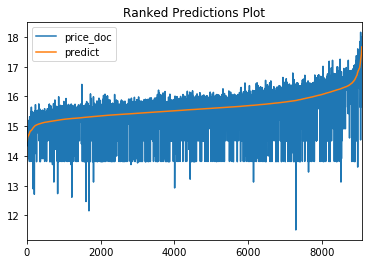

In [55]:
stack_preds1_val = stack.predict(valid)
ranked_preds_plot('price_doc', valid, stack_preds1_val) 
stack_preds1_test = stack.predict(test)
gen_submission(stack_preds1_test)

#### Shutdown H2O

In [ ]:
# Shutdown H2O - this will erase all your unsaved frames and models in H2O
h2o.cluster().shutdown(prompt=True)